In [1]:
# Import keras
from keras.applications.vgg16 import VGG16

# Deklarasi VGG16 sebagai model yang akan dipakai
model = VGG16()

# Tampilkan semua layer model VGG16
model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

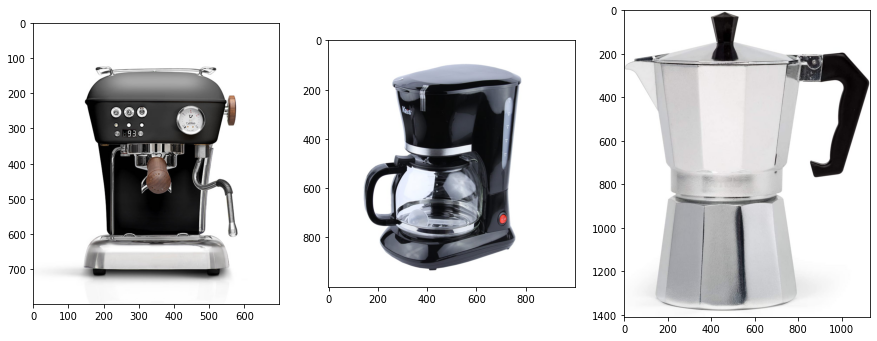

(3, 224, 224, 3)


In [14]:
import requests 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 

urls = [] # list kosong untuk url gambar
urls.append("https://cdn.shopify.com/s/files/1/0344/1954/0107/files/Black_hero.jpg?v=1590076409")
urls.append("https://res.cloudinary.com/ruparupa-com/image/upload//f_auto,q_auto:eco/v1664986775/Products/10060134_1.jpg")
urls.append("http://sc04.alicdn.com/kf/H94328f7c6211432a988fcc615f609c5b5.jpg")

imgs = []
plt.figure(figsize=(15,6))
for u in range(0, len(urls)):
  r = requests.get(urls[u], stream=True) #konversi menjadi gambar yang akan di download
  img = np.array(Image.open(r.raw)) #konversi menjadi array
  plt.subplot(1, len(urls), u+1)
  plt.imshow(img)
  img = cv2.resize(img, (224,224)) #resize sesuai input vgg16
  imgs.append(img) 
plt.show()
imgs = np.array(imgs) #konversi semua gambar yang ada di array imgs menjadi numpy array
print(imgs.shape) #mengecek shape apakah sesuai dengan input vgg16

In [15]:
# Klasifikasi mesin espresso
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) == 550): # 550: kelas espresso maker
    print("Espresso maker")
  else:
    print("Not espresso maker")

1/1 [==============================] - 2s 2s/step
Espresso maker
Espresso maker
Not espresso maker


In [16]:
yh.shape

(3, 1000)

In [17]:
yh[0]

array([1.41063228e-09, 2.46981302e-09, 8.63803529e-10, 5.90792248e-10,
       1.12674547e-09, 2.30952968e-09, 1.44331196e-11, 1.67067149e-09,
       5.63539304e-09, 1.95544830e-10, 1.09643548e-08, 1.27411397e-08,
       1.13267426e-07, 3.76445675e-09, 3.52434206e-08, 1.71607493e-08,
       1.03253591e-07, 2.87271029e-09, 9.26922539e-09, 6.49102887e-08,
       1.09157305e-09, 1.65919178e-09, 7.88328292e-10, 2.19814300e-09,
       2.69267553e-10, 1.85855042e-09, 1.76712378e-09, 2.06496442e-09,
       3.47697232e-10, 3.44530839e-08, 4.29893099e-09, 7.95521604e-09,
       1.83440925e-08, 1.35545838e-10, 7.84196319e-11, 1.89962476e-10,
       1.03454167e-09, 3.05206832e-10, 7.23138938e-10, 3.97261501e-10,
       8.29483149e-10, 1.04357289e-09, 1.03121234e-09, 6.46189724e-09,
       3.41914075e-09, 1.46463930e-09, 2.39264253e-09, 2.40334170e-08,
       5.81781567e-10, 1.17139021e-10, 2.05434461e-10, 1.46012979e-08,
       1.54593205e-09, 1.34926059e-09, 8.96948460e-10, 9.21935805e-10,
      

In [18]:
np.argmax(yh[0])

550